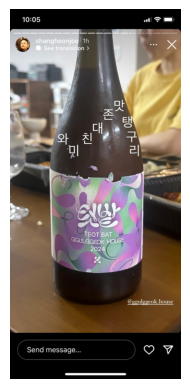

In [2]:
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 파일 열기
img = Image.open('wine.jpg')

# 이미지 표시
plt.imshow(img)
plt.axis('off')  # 축 숨기기
plt.show()  # 이미지 표시                                                                               

In [3]:
# STEP 1: Import the necessary modules.
import numpy as np
import urllib.request
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import matplotlib.pyplot as plt
from pprint import pprint


# STEP 2: Define a function to download the model from a URL
def download_model(url, filename="efficientdet_lite0.tflite"):
    urllib.request.urlretrieve(url, filename)
    return filename

# STEP 3: Download the model from the URL
model_url = 'https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite0/int8/1/efficientdet_lite0.tflite'
model_file = download_model(model_url)

print(model_file)

# STEP 4: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path='efficientdet_lite0.tflite')
options = vision.ObjectDetectorOptions(base_options=base_options,
                                       score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

# STEP 5: Load the input image.
image = mp.Image.create_from_file('wine.jpg')

# STEP 4: Detect objects in the input image.
detection_result = detector.detect(image)

# # STEP 5: Process the detection result. In this case, visualize it.
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)
plt.imshow(annotated_image)
plt.axis('off')

pprint(detection_result)

efficientdet_lite0.tflite


c:\Users\epdgn\anaconda3\envs\proj2\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


NameError: name 'visualize' is not defined

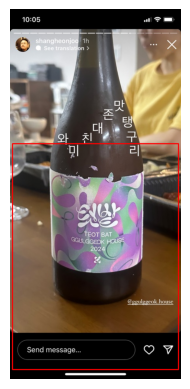

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=6,
                                                               origin_y=349,
                                                               width=430,
                                                               height=586),
                                      categories=[Category(index=None,
                                                           score=0.59375,
                                                           display_name=None,
                                                           category_name='dining '
                                                                         'table')],
                                      keypoints=[])])
Category Names: ['dining table']


In [4]:
# STEP 1: Import the necessary modules.
import numpy as np
import urllib.request
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from PIL import Image
import matplotlib.pyplot as plt
from pprint import pprint

# STEP 2: Define a function to download the model from a URL
def download_model(url, filename="efficientdet_lite0.tflite"):
    urllib.request.urlretrieve(url, filename)
    return filename

# STEP 3: Download the model from the URL
model_url = 'https://storage.googleapis.com/mediapipe-models/object_detector/efficientdet_lite0/int8/1/efficientdet_lite0.tflite'
model_file = download_model(model_url)

# STEP 4: Create an ObjectDetector object.
base_options = python.BaseOptions(model_asset_path=model_file)
options = vision.ObjectDetectorOptions(base_options=base_options, score_threshold=0.5)
detector = vision.ObjectDetector.create_from_options(options)

# STEP 5: Load the input image
image_path = 'wine.jpg'
image = mp.Image.create_from_file(image_path)

# STEP 6: Detect objects in the input image
detection_result = detector.detect(image)

# STEP 7: Define a function to visualize the detection results
def visualize(image, detection_result):
    # Convert Mediapipe image to a numpy array for manipulation
    image_np = np.array(image)
    for detection in detection_result.detections:
        bbox = detection.bounding_box
        start_point = (int(bbox.origin_x), int(bbox.origin_y))
        end_point = (int(bbox.origin_x + bbox.width), int(bbox.origin_y + bbox.height))
        color = (255, 0, 0)  # Red color for bounding box
        thickness = 2
        image_np = cv2.rectangle(image_np, start_point, end_point, color, thickness)
    return image_np

# Visualize the results
image_copy = np.copy(image.numpy_view())
annotated_image = visualize(image_copy, detection_result)

# Convert image to RGB for matplotlib
plt.imshow(annotated_image)
plt.axis('off')  # Hide axes
plt.show()  # Display the image

# Print the detection result for reference
pprint(detection_result)

# 한 줄로 category_name 추출
category_names = [cat.category_name for det in detection_result.detections for cat in det.categories]
print("Category Names:", category_names)


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


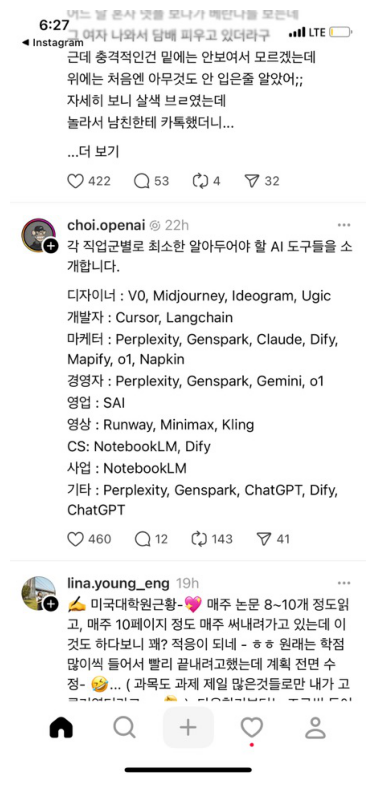

Category Names: []


In [5]:
# STEP 1: 필요한 모듈 가져오기
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np

# STEP 2: 모델과 이미지 프로세서 초기화
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

# STEP 3: 이미지 로드
image_path = 'text.jpg'  # 이미지 파일 경로
image = Image.open(image_path)

# STEP 4: 이미지 전처리 및 객체 감지
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# STEP 5: 결과 처리
# 감지된 객체의 인덱스와 점수 추출
target_sizes = torch.tensor([image.size[::-1]])  # (높이, 너비) 형식으로 변환
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# STEP 6: 시각화 함수 정의
def visualize(image, results):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = box.detach().numpy()
        plt.rectangle = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                       fill=False, color="red", linewidth=3)
        plt.gca().add_patch(plt.rectangle)
        plt.text(box[0], box[1], f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}",
                 fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.5))
    
    plt.axis("off")
    plt.show()

# STEP 7: 결과 시각화
visualize(image, results)

# STEP 8: 감지된 카테고리 이름 출력
category_names = [model.config.id2label[label.item()] for label in results["labels"]]
print("Category Names:", category_names)


In [16]:
# !pip install git+https://github.com/openai/CLIP.git
# !pip install torch torchvision


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


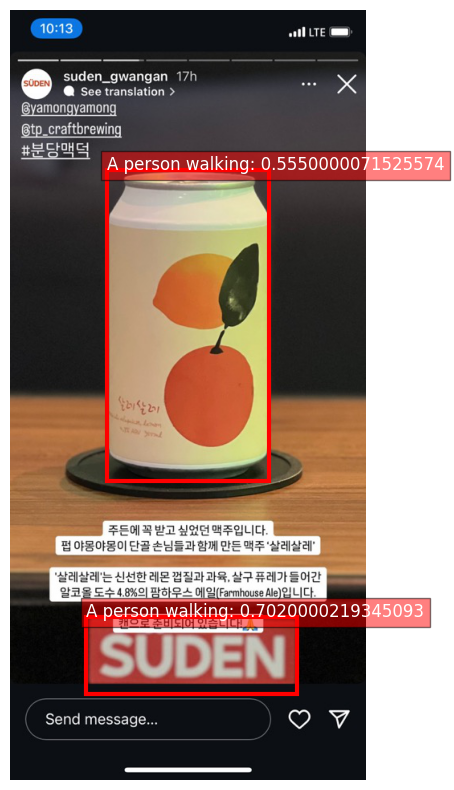

In [6]:
# STEP 1: 필요한 모듈 가져오기
import torch
import clip
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np

# STEP 2: DETR 모델과 이미지 프로세서 초기화
detr_model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

# STEP 3: CLIP 모델과 프로세서 초기화
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device=device)

# STEP 4: 이미지 로드
image_path = 'beer.jpg'  # 이미지 파일 경로
image = Image.open(image_path)

# STEP 5: DETR 이미지 전처리 및 객체 감지
inputs = processor(images=image, return_tensors="pt")
outputs = detr_model(**inputs)

# STEP 6: DETR 결과 처리
target_sizes = torch.tensor([image.size[::-1]])  # (높이, 너비) 형식으로 변환
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# STEP 7: CLIP을 통한 텍스트-이미지 매칭
# 감지된 객체마다 CLIP 모델을 사용해 설명과의 유사도를 계산

# 매칭할 텍스트 라벨 정의
text_labels = ["A photo of a cat", "A person walking", "A car on the road"]
text_inputs = clip.tokenize(text_labels).to(device)

# 시각화 함수 정의
def visualize_with_clip(image, results, text_labels, text_inputs):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    # 감지된 객체 별로 CLIP 유사도 계산 및 시각화
    for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
        box = box.detach().numpy()
        cropped_image = image.crop((box[0], box[1], box[2], box[3]))
        processed_cropped_image = preprocess(cropped_image).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features = clip_model.encode_image(processed_cropped_image)
            text_features = clip_model.encode_text(text_inputs)
            similarity = (image_features @ text_features.T).softmax(dim=-1).cpu().numpy()[0]

        # 가장 유사한 텍스트 레이블 선택
        best_label_idx = similarity.argmax()
        best_label = text_labels[best_label_idx]
        best_score = similarity[best_label_idx]

        # Bounding box 시각화
        plt.rectangle = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                       fill=False, color="red", linewidth=3)
        plt.gca().add_patch(plt.rectangle)
        plt.text(box[0], box[1], f"{best_label}: {round(best_score, 3)}",
                 fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.5))
    
    plt.axis("off")
    plt.show()

# STEP 8: CLIP 결과 시각화
visualize_with_clip(image, results, text_labels, text_inputs)


In [10]:
#pip install easyocr

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.
Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassi

Extracted Texts: ['10:13', 'LTE', 'suden_gwangan', '17h', 'SUDEN', 'See translation', '@yamongyamong', 'craftbrewing', '#분당맥덕', '보Fe', '주문에 꼭 반고 싶엎면 맥주입니다.', "퍽아동아동이단골 손님들과함께 만문 맥주 '살레살레'", "'살레살레'눈 신선한 레문 껍질과 과육 살구 퓨레가 들어간", '알코올 도수 4.89 의 판하우스 에일(Farmhouse Ale)입니다:', "캠으로 준비되어 있습니다'  ", 'SUDEN', 'Send message .', '{ 날다 `']


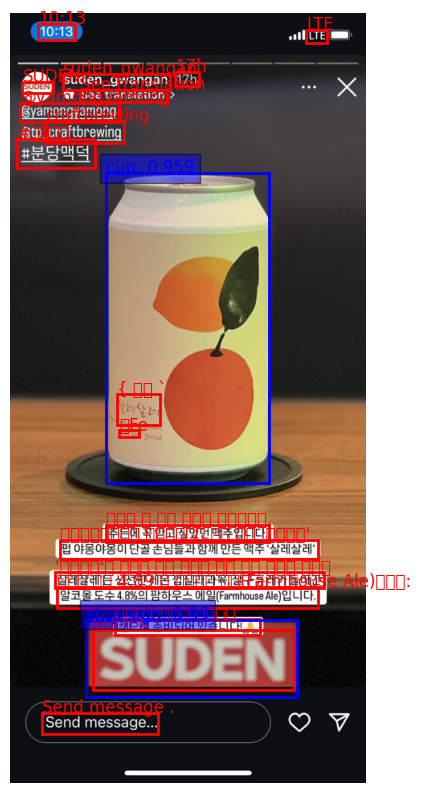

In [19]:
import easyocr
import matplotlib.pyplot as plt
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image

# EasyOCR로 영어와 한국어 텍스트 추출
reader = easyocr.Reader(['en', 'ko'])  # 영어와 한국어 언어 설정

# DETR 모델 및 이미지 프로세서 초기화
detr_model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

# 이미지 경로 설정
image_path = 'beer.jpg'  # 스크린샷 경로
image = Image.open(image_path)

# EasyOCR을 사용하여 텍스트 추출
results = reader.readtext(image_path)
extracted_texts = [result[1] for result in results]
print("Extracted Texts:", extracted_texts)

# DETR을 사용하여 객체 감지
inputs = processor(images=image, return_tensors="pt")
outputs = detr_model(**inputs)

# 감지된 객체 결과 처리
target_sizes = torch.tensor([image.size[::-1]])  # (높이, 너비) 형식으로 변환
detr_results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# 이미지 시각화 함수
def visualize_results(image_path, results, detections):
    image = plt.imread(image_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    # EasyOCR 결과 시각화
    for (bbox, text, prob) in results:
        bbox = [[int(point[0]), int(point[1])] for point in bbox]  # 좌표를 정수형으로 변환
        plt.rectangle = plt.Rectangle((bbox[0][0], bbox[0][1]), 
                                       bbox[2][0] - bbox[0][0], 
                                       bbox[2][1] - bbox[0][1], 
                                       fill=False, color="red", linewidth=2)
        plt.gca().add_patch(plt.rectangle)
        plt.text(bbox[0][0], bbox[0][1], text, fontsize=12, color='red')

    # DETR 결과 시각화
    for score, label, box in zip(detections["scores"], detections["labels"], detections["boxes"]):
        box = box.detach().numpy().astype(int)
        plt.rectangle = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                       fill=False, color="blue", linewidth=2)
        plt.gca().add_patch(plt.rectangle)
        plt.text(box[0], box[1], f"{detr_model.config.id2label[label.item()]}: {round(score.item(), 3)}",
                 fontsize=12, color='blue', bbox=dict(facecolor='blue', alpha=0.5))

    plt.axis("off")
    plt.show()

# 결과 시각화
visualize_results(image_path, results, detr_results)


In [28]:
import torch
import clip
from PIL import Image
import os

# CLIP 모델 및 프로세서 초기화
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model, preprocess = clip.load("ViT-B/32", device=device)

# 이미지 폴더 경로 설정
image_folder = 'images/'  # 이미지가 저장된 폴더 경로
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# 여러 이미지를 로드하고 전처리
images = []
for file in image_files:
    image_path = os.path.join(image_folder, file)
    try:
        img = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
        images.append(img)
    except Exception as e:
        print(f"Error loading image {file}: {e}")

# 이미지 특징 추출
with torch.no_grad():
    image_features = torch.cat([clip_model.encode_image(img) for img in images], dim=0)

# 유사도 행렬 계산 (코사인 유사도)
similarity_matrix = (image_features @ image_features.T).cpu().numpy()

# 유사도 결과 출력
for i in range(len(image_files)):
    for j in range(i + 1, len(image_files)):
        print(f"Cosine Similarity between {image_files[i]} and {image_files[j]}: {similarity_matrix[i][j]:.4f}")


Cosine Similarity between beer.jpg and running.jpg: 35.6797
Cosine Similarity between beer.jpg and wine.jpg: 64.9962
Cosine Similarity between beer.jpg and wine1.jpg: 51.5388
Cosine Similarity between beer.jpg and wine2'.jpg: 53.3973
Cosine Similarity between beer.jpg and wine3.jpg: 50.5547
Cosine Similarity between running.jpg and wine.jpg: 36.7339
Cosine Similarity between running.jpg and wine1.jpg: 41.0635
Cosine Similarity between running.jpg and wine2'.jpg: 39.8519
Cosine Similarity between running.jpg and wine3.jpg: 31.0695
Cosine Similarity between wine.jpg and wine1.jpg: 54.7265
Cosine Similarity between wine.jpg and wine2'.jpg: 60.3660
Cosine Similarity between wine.jpg and wine3.jpg: 56.7353
Cosine Similarity between wine1.jpg and wine2'.jpg: 68.1604
Cosine Similarity between wine1.jpg and wine3.jpg: 63.4890
Cosine Similarity between wine2'.jpg and wine3.jpg: 77.2376


Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


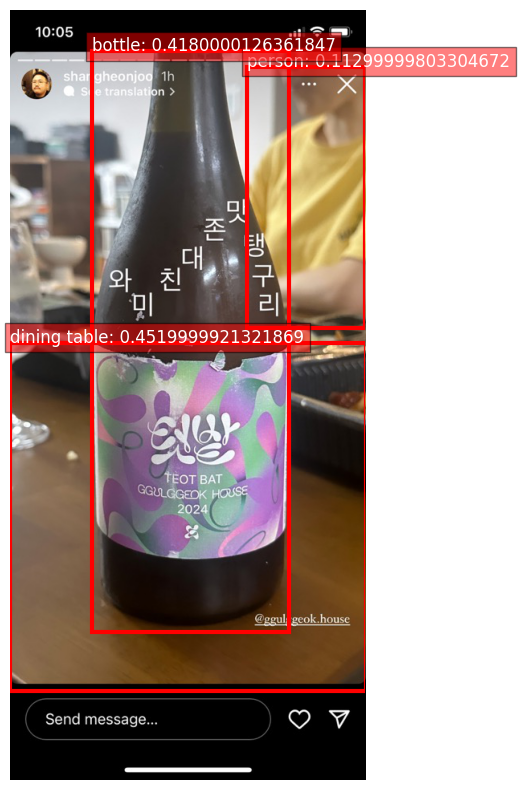

Top Category Names: ['person', 'bottle', 'dining table']


In [8]:
# STEP 1: 필요한 모듈 가져오기
import torch
from transformers import DetrImageProcessor, DetrForObjectDetection
from PIL import Image
import matplotlib.pyplot as plt

# STEP 2: 모델과 이미지 프로세서 초기화
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-50")
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-50")

# STEP 3: 이미지 로드
image_path = 'wine.jpg'  # 이미지 파일 경로
image = Image.open(image_path)

# STEP 4: 이미지 전처리 및 객체 감지
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# STEP 5: 결과 처리
# 감지된 객체의 인덱스와 점수 추출
target_sizes = torch.tensor([image.size[::-1]])  # (높이, 너비) 형식으로 변환
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.9)[0]

# STEP 6: 면적 비율 계산
image_area = image.size[0] * image.size[1]  # 이미지 전체 면적
area_ratios = []

for box in results["boxes"]:
    box = box.detach().numpy()
    box_area = (box[2] - box[0]) * (box[3] - box[1])  # 경계 상자의 면적
    area_ratios.append(box_area / image_area)  # 면적 비율 계산

# STEP 7: 상위 N개 객체 선택 (예: 상위 2개)
top_n = 3  # 필요 시 N의 값을 조정하세요
top_indices = np.argsort(area_ratios)[-top_n:]  # 면적 비율이 가장 높은 상위 N개 인덱스 선택

# STEP 8: 시각화 함수 정의
def visualize(image, results, top_indices):
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    for idx in top_indices:
        label = results["labels"][idx]
        box = results["boxes"][idx].detach().numpy()
        
        # 경계 상자 그리기
        plt.rectangle = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                       fill=False, color="red", linewidth=3)
        plt.gca().add_patch(plt.rectangle)
        plt.text(box[0], box[1], f"{model.config.id2label[label.item()]}: {round(area_ratios[idx], 3)}",
                 fontsize=12, color='white', bbox=dict(facecolor='red', alpha=0.5))

    plt.axis("off")
    plt.show()

# STEP 9: 결과 시각화 (상위 N개만)
visualize(image, results, top_indices)

# STEP 10: 감지된 카테고리 이름 출력 (상위 N개)
category_names = [model.config.id2label[results["labels"][idx].item()] for idx in top_indices]
print("Top Category Names:", category_names)
